In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
users = pd.read_csv('data/users.dat', sep='::', names=['id','gender','age','occupation','region'])
users.head()

,id,gender,age,occupation,region
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   region      6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [4]:
users.describe()

,id,age,occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [5]:
users.gender.value_counts()

gender
M    4331
F    1709
Name: count, dtype: int64

In [6]:
users.occupation.value_counts()

occupation
4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: count, dtype: int64

In [7]:
users.region.value_counts()

region
48104    19
22903    18
55104    17
94110    17
10025    16
         ..
06840     1
70072     1
14706     1
95350     1
43231     1
Name: count, Length: 3439, dtype: int64

In [8]:
users.age.value_counts()

age
25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: count, dtype: int64

In [9]:
users.region.nunique()

3439

<Axes: ylabel='age'>

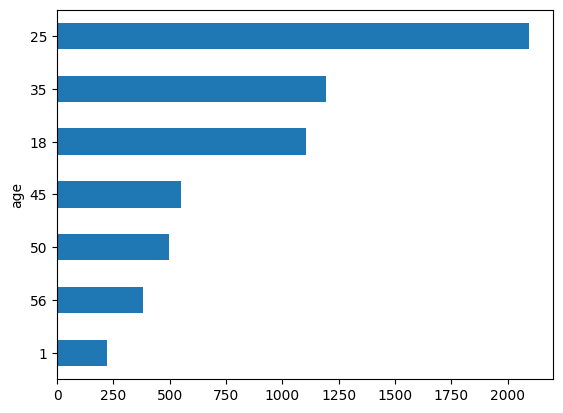

In [10]:
# 연령 분포 확인
users.age.value_counts().sort_values().plot(kind='barh')

<Axes: xlabel='age'>

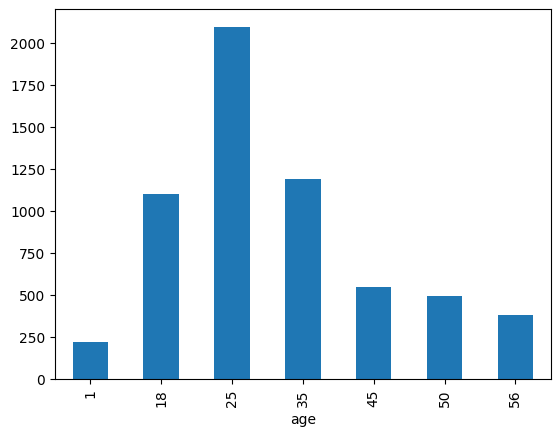

In [11]:
# 연령 분포 확인
users.age.value_counts().sort_index().plot(kind='bar')

In [12]:
movies = pd.read_csv('data/movies.dat', sep='::', names=['id','title','genre'], encoding='latin-1')
movies.head()

,id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3883 non-null   int64 
 1   title   3883 non-null   object
 2   genre   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [14]:
movies.title

0                         Toy Story (1995)
1                           Jumanji (1995)
2                  Grumpier Old Men (1995)
3                 Waiting to Exhale (1995)
4       Father of the Bride Part II (1995)
                       ...                
3878               Meet the Parents (2000)
3879            Requiem for a Dream (2000)
3880                      Tigerland (2000)
3881               Two Family House (2000)
3882                 Contender, The (2000)
Name: title, Length: 3883, dtype: object

In [15]:
# 연도 컬럼을 만들어보기
movies.title.str.split('(', expand=True)

,0,1,2,3
0,Toy Story,1995),None,None
1,Jumanji,1995),None,None
2,Grumpier Old Men,1995),None,None
3,Waiting to Exhale,1995),None,None
4,Father of the Bride Part II,1995),None,None
...,...,...,...,...
3878,Meet the Parents,2000),None,None
3879,Requiem for a Dream,2000),None,None
3880,Tigerland,2000),None,None
3881,Two Family House,2000),None,None


In [16]:
# 연도 컬럼을 추가하기
# .str.extract() 를 반드시 알아두자!
movies['year'] = movies.title.str.extract(r"\((\d{4})\)").astype(int)

In [17]:
movies.info()
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3883 non-null   int64 
 1   title   3883 non-null   object
 2   genre   3883 non-null   object
 3   year    3883 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


,id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


<Axes: ylabel='Frequency'>

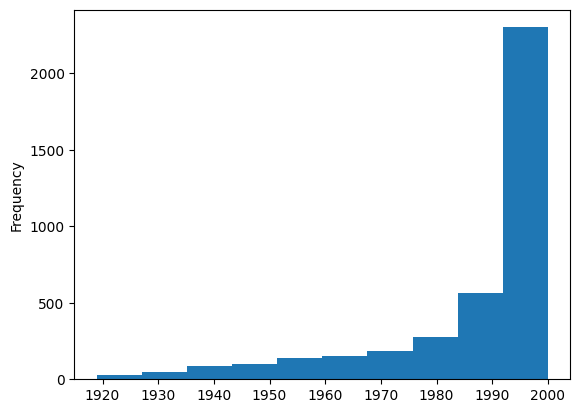

In [18]:
movies.year.sort_index().plot(kind='hist')

In [19]:
ratings = pd.read_csv('data/ratings.dat', sep="::", names=['user_id','movie_id','score','timestamp'])

In [20]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   score      1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [21]:
ratings.user_id.nunique()

6040

<Axes: ylabel='Frequency'>

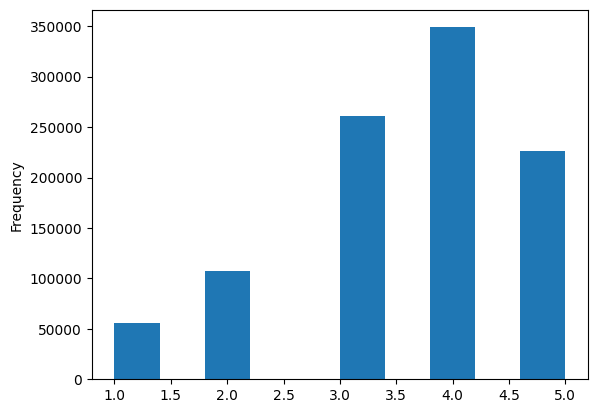

In [22]:
ratings.score.plot(kind='hist')

In [23]:
# 3개의 데이터 프레임을 합치기
data = ratings.merge(users, left_on='user_id', right_on='id').drop('id', axis=1)

In [24]:
data.head()

,user_id,movie_id,score,timestamp,gender,age,occupation,region
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [25]:
data = data.merge(movies, left_on='movie_id', right_on='id').drop('id', axis=1)

In [26]:
data.head()

,user_id,movie_id,score,timestamp,gender,age,occupation,region,title,genre,year
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,1996
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,1964
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,2000
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,1998


In [27]:
# 보고싶은 영화 찾기
data.groupby(['title'])['score'].mean()
# 이렇게도 할수 있고 피벗테이블로도 할 수 있다! 매우 중요함.

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: score, Length: 3706, dtype: float64

In [28]:
ex1 = data.pivot_table(index='title', values='score', aggfunc='mean')

In [29]:
print(data.title.nunique(), data.movie_id.nunique())
# 두 컬럼 고유값 갯수가 같다.

3706 3706


In [30]:
ex1.sort_values('score', ascending=False)

,score
title,
Lured (1947),5.0
Ulysses (Ulisse) (1954),5.0
"Baby, The (1973)",5.0
Follow the Bitch (1998),5.0
Schlafes Bruder (Brother of Sleep) (1995),5.0
...,...
Terror in a Texas Town (1958),1.0
White Boys (1999),1.0
Mutters Courage (1995),1.0


In [31]:
ex2 = data.pivot_table(index='title', values='score', aggfunc=['mean','count'])
# 영화제목별로 평균평점과 평점갯수를 새로운 테이블로 생성
# 이는 평점갯수가 작은데 평점이 높은 영화를 걸러내는 목적이다.

In [32]:
ex2
# 컬럼 인덱스가 멀티인덱스다

,mean,count
,score,score
title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199
...,...,...
"Zed & Two Noughts, A (1985)",3.413793,29
Zero Effect (1998),3.750831,301


In [33]:
# 멀티인덱스를 제거한다.
print(ex2.columns)
ex2.columns = ['mean_score', 'count_score']
print(ex2.columns)

MultiIndex([( 'mean', 'score'),
            ('count', 'score')],
           )
Index(['mean_score', 'count_score'], dtype='object')


In [34]:
ex2.head()

,mean_score,count_score
title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


In [35]:
# qcut 으로 3구간으로 나눈다
ex2['score_level'] = pd.qcut(ex2.mean_score, 3, labels=['low','mid','high'])
ex2.head()

,mean_score,count_score,score_level
title,,,
"$1,000,000 Duck (1971)",3.027027,37,mid
'Night Mother (1986),3.371429,70,mid
'Til There Was You (1997),2.692308,52,low
"'burbs, The (1989)",2.910891,303,low
...And Justice for All (1979),3.713568,199,high


In [36]:
# 또는 Q1, Q3 를 사용해서 범주화 컬럼을 생성할 수 있다.
q1 = ex2.mean_score.quantile(0.25)
q3 = ex2.mean_score.quantile(0.75)
ex2['score_qlevel'] = pd.cut(ex2.mean_score, bins=[0, q1, q3, ex2.mean_score.max()], labels=['qlow', 'qmid', 'qhigh'])

In [37]:
ex2.head()

,mean_score,count_score,score_level,score_qlevel
title,,,,
"$1,000,000 Duck (1971)",3.027027,37,mid,qmid
'Night Mother (1986),3.371429,70,mid,qmid
'Til There Was You (1997),2.692308,52,low,qlow
"'burbs, The (1989)",2.910891,303,low,qmid
...And Justice for All (1979),3.713568,199,high,qmid


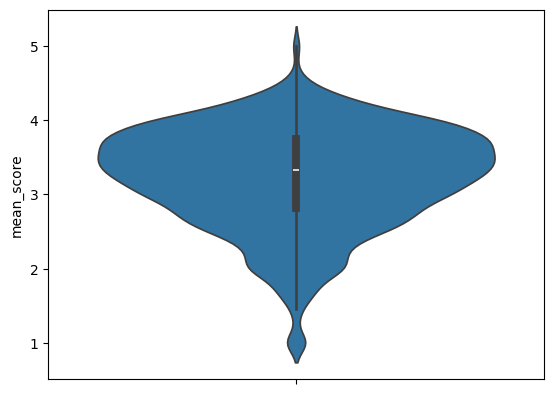

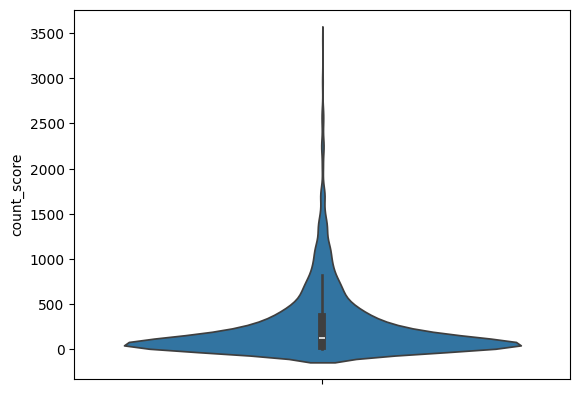

In [38]:
sns.violinplot(data=ex2.mean_score)
plt.show()
sns.violinplot(data=ex2.count_score)
plt.show()

In [39]:
# 영화 선택하기
# 평점 평균값과 갯수, 출력순서정렬
ex3 = ex2[(ex2.mean_score >= 4.3) & (ex2.count_score >= 2000)].sort_values(by='mean_score', ascending=False)
ex3

,mean_score,count_score,score_level,score_qlevel
title,,,,
"Shawshank Redemption, The (1994)",4.554558,2227,high,qhigh
"Godfather, The (1972)",4.524966,2223,high,qhigh
Schindler's List (1993),4.510417,2304,high,qhigh
Raiders of the Lost Ark (1981),4.477725,2514,high,qhigh
Star Wars: Episode IV - A New Hope (1977),4.453694,2991,high,qhigh
"Sixth Sense, The (1999)",4.406263,2459,high,qhigh
"Silence of the Lambs, The (1991)",4.351823,2578,high,qhigh
Saving Private Ryan (1998),4.337354,2653,high,qhigh
American Beauty (1999),4.317386,3428,high,qhigh


In [40]:
ex4 = data.pivot_table(index='title', columns='gender', values='score', aggfunc=['mean', 'count'])
ex4

mean           count       
gender                                             F         M     F      M
title                                                                      
$1,000,000 Duck (1971)                      3.375000  2.761905  16.0   21.0
'Night Mother (1986)                        3.388889  3.352941  36.0   34.0
'Til There Was You (1997)                   2.675676  2.733333  37.0   15.0
'burbs, The (1989)                          2.793478  2.962085  92.0  211.0
...And Justice for All (1979)               3.828571  3.689024  35.0  164.0
...                                              ...       ...   ...    ...
Zed & Two Noughts, A (1985)                 3.500000  3.380952   8.0   21.0
Zero Effect (1998)                          3.864407  3.723140  59.0  242.0
Zero Kelvin (Kjærlighetens kjøtere) (1995)       NaN  3.500000   NaN    2.0
Zeus and Roxanne (1997)                     2.777778  2.357143   9.0   14.0
eXistenZ (1999)                             3.098592  3.289086  71.0  339.0

[3706 rows x 4 columns]

In [41]:
# 여성만의 평점이 4.0 이상
female_movies = ex4[(ex4[('mean','F')] >= 4.0) & (ex4[('count','F')] >= 500)]
female_movies = female_movies.drop([('mean', 'M'),('count','M')], axis=1)
female_movies

,mean,count
gender,F,F
title,,
American Beauty (1999),4.238901,946.0
Being John Malkovich (1999),4.159930,569.0
Braveheart (1995),4.016484,546.0
Casablanca (1942),4.300990,505.0
E.T. the Extra-Terrestrial (1982),4.089850,601.0
Fargo (1996),4.217656,657.0
Forrest Gump (1994),4.045031,644.0
L.A. Confidential (1997),4.106007,566.0


In [42]:
# 여성인기영화의 장르 정보 가져오기
# 방법-1
genre_female = movies.genre[movies.title.isin(female_movies.index)]
genre_female

0              Animation|Children's|Comedy
108                       Action|Drama|War
257        Action|Adventure|Fantasy|Sci-Fi
293                            Crime|Drama
315                                  Drama
352                     Comedy|Romance|War
523                              Drama|War
589                         Drama|Thriller
604                   Crime|Drama|Thriller
900                      Drama|Romance|War
907     Adventure|Children's|Drama|Musical
1081       Children's|Drama|Fantasy|Sci-Fi
1178     Action|Adventure|Drama|Sci-Fi|War
1179       Action|Adventure|Comedy|Romance
1180                      Action|Adventure
1575      Crime|Film-Noir|Mystery|Thriller
1959                      Action|Drama|War
2327                        Comedy|Romance
2502                Action|Sci-Fi|Thriller
2693                              Thriller
2789                          Comedy|Drama
2928                                Comedy
Name: genre, dtype: object

In [43]:
genre_female.reset_index(drop=True)

0            Animation|Children's|Comedy
1                       Action|Drama|War
2        Action|Adventure|Fantasy|Sci-Fi
3                            Crime|Drama
4                                  Drama
5                     Comedy|Romance|War
6                              Drama|War
7                         Drama|Thriller
8                   Crime|Drama|Thriller
9                      Drama|Romance|War
10    Adventure|Children's|Drama|Musical
11       Children's|Drama|Fantasy|Sci-Fi
12     Action|Adventure|Drama|Sci-Fi|War
13       Action|Adventure|Comedy|Romance
14                      Action|Adventure
15      Crime|Film-Noir|Mystery|Thriller
16                      Action|Drama|War
17                        Comedy|Romance
18                Action|Sci-Fi|Thriller
19                              Thriller
20                          Comedy|Drama
21                                Comedy
Name: genre, dtype: object

In [44]:
# 방법-2
movies2 = movies.set_index('title')
female_movies = pd.concat([female_movies, movies2.genre], axis=1, join='inner')
genre_female = female_movies.genre
genre_female
# concat(): Merge multiple Series or DataFrame objects along a shared index or column
# merge(): Combine two Series or DataFrame objects with SQL-style joining

title
American Beauty (1999)                                                         Comedy|Drama
Being John Malkovich (1999)                                                          Comedy
Braveheart (1995)                                                          Action|Drama|War
Casablanca (1942)                                                         Drama|Romance|War
E.T. the Extra-Terrestrial (1982)                           Children's|Drama|Fantasy|Sci-Fi
Fargo (1996)                                                           Crime|Drama|Thriller
Forrest Gump (1994)                                                      Comedy|Romance|War
L.A. Confidential (1997)                                   Crime|Film-Noir|Mystery|Thriller
Matrix, The (1999)                                                   Action|Sci-Fi|Thriller
Princess Bride, The (1987)                                  Action|Adventure|Comedy|Romance
Pulp Fiction (1994)                                                       

In [45]:
genre_female = genre_female.reset_index(drop=True)

In [46]:
genre_female.info()

<class 'pandas.core.series.Series'>
RangeIndex: 22 entries, 0 to 21
Series name: genre
Non-Null Count  Dtype 
--------------  ----- 
22 non-null     object
dtypes: object(1)
memory usage: 308.0+ bytes


In [47]:
genre_female.head()

0                       Comedy|Drama
1                             Comedy
2                   Action|Drama|War
3                  Drama|Romance|War
4    Children's|Drama|Fantasy|Sci-Fi
Name: genre, dtype: object

In [48]:
genre_list = [val for val in genre_female.str.split('|', expand=False)]
genre_list

[['Comedy', 'Drama'],
 ['Comedy'],
 ['Action', 'Drama', 'War'],
 ['Drama', 'Romance', 'War'],
 ["Children's", 'Drama', 'Fantasy', 'Sci-Fi'],
 ['Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Romance', 'War'],
 ['Crime', 'Film-Noir', 'Mystery', 'Thriller'],
 ['Action', 'Sci-Fi', 'Thriller'],
 ['Action', 'Adventure', 'Comedy', 'Romance'],
 ['Crime', 'Drama'],
 ['Action', 'Adventure'],
 ['Action', 'Drama', 'War'],
 ['Drama', 'War'],
 ['Comedy', 'Romance'],
 ['Drama'],
 ['Drama', 'Thriller'],
 ['Thriller'],
 ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'],
 ['Action', 'Adventure', 'Drama', 'Sci-Fi', 'War'],
 ['Animation', "Children's", 'Comedy'],
 ['Adventure', "Children's", 'Drama', 'Musical']]

In [49]:
# 1차원 리스트로 변환
flat_genre_list = [item for sublist in genre_list for item in sublist]
flat_genre_list

['Comedy',
 'Drama',
 'Comedy',
 'Action',
 'Drama',
 'War',
 'Drama',
 'Romance',
 'War',
 "Children's",
 'Drama',
 'Fantasy',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Romance',
 'War',
 'Crime',
 'Film-Noir',
 'Mystery',
 'Thriller',
 'Action',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Comedy',
 'Romance',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Action',
 'Drama',
 'War',
 'Drama',
 'War',
 'Comedy',
 'Romance',
 'Drama',
 'Drama',
 'Thriller',
 'Thriller',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'War',
 'Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Drama',
 'Musical']

In [50]:
# 다른 방법
flat2_genre_list = np.hstack(genre_list)
flat2_genre_list.tolist()

['Comedy',
 'Drama',
 'Comedy',
 'Action',
 'Drama',
 'War',
 'Drama',
 'Romance',
 'War',
 "Children's",
 'Drama',
 'Fantasy',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Romance',
 'War',
 'Crime',
 'Film-Noir',
 'Mystery',
 'Thriller',
 'Action',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Comedy',
 'Romance',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Action',
 'Drama',
 'War',
 'Drama',
 'War',
 'Comedy',
 'Romance',
 'Drama',
 'Drama',
 'Thriller',
 'Thriller',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'War',
 'Animation',
 "Children's",
 'Comedy',
 'Adventure',
 "Children's",
 'Drama',
 'Musical']

In [51]:
pd.Series(flat_genre_list).str.contains('Romance').sum()

np.int64(4)

<Axes: >

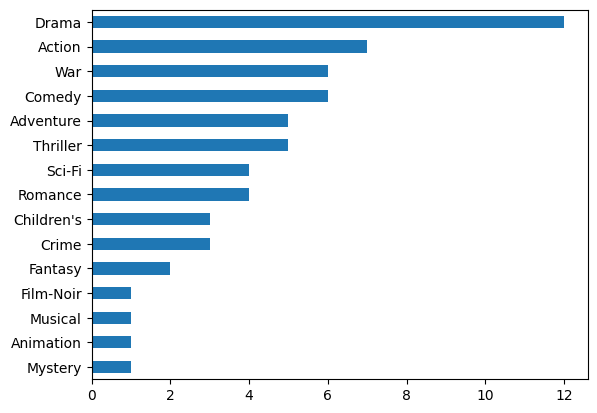

In [52]:
pd.Series(flat_genre_list).value_counts().sort_values().plot(kind='barh')

In [53]:
pd.Series(flat_genre_list).str.extract(r'(Romance)').count()

0    4
dtype: int64

In [54]:
pd.Series(flat_genre_list).mode()[0]

'Drama'